# De Saint Venant Problem

The strong De Saint Venant problem is as follows:

Consider a beam made of a homogeneous, isotropic, and elastic material. Assume that load distributions exist only on the bases of the beam, and therefore there are no forces on the surface of the beam, and the force of gravity can be neglected. The aim is to determine the tensor field of stresses, strains, and displacements. Using the De Saint Venant principle, it is possible to reduce the strong problem to a weak one, i.e., to replace the load distributions on the bases with macroscopic forces and twisting moments, still applied on the bases of the beam.

We will identify fundamental cases in which the weak problem has an analytical solution.

In [1]:
# Importing libraries for plotting
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Plotting function
def plotter(u_x, u_y, u_z, title):

    # Grid setup for vector field
    x = np.linspace(-2.5, 2.5, 10)
    y = np.linspace(-2.5, 2.5, 10)
    z = np.linspace(0, 5, 10)
    X, Y, Z = np.meshgrid(x, y, z)

    # Compute vector components as functions of X, Y, Z
    u = u_x(X, Y, Z)
    v = u_y(X, Y, Z)
    w = u_z(X, Y, Z)

    # Compute vector magnitudes
    magnitude = np.sqrt(u ** 2 + v ** 2 + w ** 2).ravel()

    # Create plot
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, projection = '3d')

    # Plot vector field with color mapping
    quiv = ax.quiver(
        X.ravel(), Y.ravel(), Z.ravel(),
        u.ravel(), v.ravel(), w.ravel(),
        array = magnitude,
        cmap = 'plasma',
        length = 0.25,
        normalize = True,
        alpha = 0.8
    )

    # Add XY-plane (z = 0)
    x_plane, y_plane = np.linspace(-2.5, 2.5, 50), np.linspace(-2.5, 2.5, 50)
    X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
    Z_plane = np.zeros_like(X_plane)
    ax.plot_surface(X_plane, Y_plane, Z_plane, color = 'gray', alpha = 0.3, zorder = -1)

    # Add colorbar
    cbar = fig.colorbar(quiv, ax = ax, shrink = 0.5, pad = 0.1)
    cbar.set_label('Vector Magnitude', rotation = 270, labelpad = 15)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Displacement vectorial field: ' + title)

    plt.tight_layout()
    plt.show()

    return None

## Traction and compression

A constant force acts on the left base of the beam along the z-axis, while a constant force acts on the right base in the opposite direction. The stress tensor field is uniform throughout the beam and can be modeled as follows:

$$
    \begin{bmatrix}
        0 & 0 & 0 \\
        0 & 0 & 0 \\
        0 & 0 & \sigma_0
    \end{bmatrix}
$$

Where $\sigma_0$ is real and can be positive or negative.

Using the Hooke's law for isotropic materials:

$$
    e_{ij} = \frac{1}{E} \left[ \left( 1 + \nu \right) \sigma_{ij} - \delta_{ij} \nu \sigma_{kk} \right]
$$

We get the tensor field of strains:

$$
    \frac{\sigma_0}{E} \begin{bmatrix}
                            - \nu & 0 & 0 \\
                            0 & - \nu & 0 \\
                            0 & 0 & 1
                        \end{bmatrix}
$$

Using the definition of the tensor field of strains:

$$
    e_{ij} \triangleq \frac{1}{2} \left( \frac{\partial u_i}{\partial x_j} + \frac{\partial u_j}{\partial x_i} \right)
$$

We get a system of partial differential equation whose solution is the displacement vector field:

$$
    \begin{cases}
        \frac{\partial u_x}{\partial x} = - \frac{\nu}{E} \sigma_0 \\
        \frac{\partial u_y}{\partial y} = - \frac{\nu}{E} \sigma_0 \\
        \frac{\partial u_z}{\partial z} = \frac{\sigma_0}{E} \\
        \frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x} = 0 \\
        \frac{\partial u_x}{\partial z} + \frac{\partial u_z}{\partial x} = 0 \\
        \frac{\partial u_y}{\partial z} + \frac{\partial u_z}{\partial y} = 0
    \end{cases}
$$

The general solution is:

$$
    \begin{cases}
        u_x = - \frac{\nu}{E} \sigma_0 x + v_1 + a y + b z \\
        u_y = - \frac{\nu}{E} \sigma_0 y + v_2 - a x + c z\\
        u_x = \frac{1}{E} \sigma_0 z + v_3 - b x - c y
    \end{cases}
$$

in vectorial notation:

$$
    \begin{bmatrix}
        u_x \\
        u_y \\
        u_z
    \end{bmatrix} = \frac{\sigma_0}{E}        \begin{bmatrix}
                                                - \nu \, x \\
                                                - \nu \, y \\
                                                z
                                                \end{bmatrix} + \begin{bmatrix}
                                                                    v_1 \\
                                                                    v_2 \\
                                                                    v_3
                                                                \end{bmatrix} +  \begin{bmatrix}
                                                                                    0 & a & b \\
                                                                                    - a & 0 & c \\
                                                                                    - b & - c & 0
                                                                                \end{bmatrix} 
                                                                                                    \begin{bmatrix}
                                                                                                        x \\
                                                                                                        y \\
                                                                                                        z
                                                                                                    \end{bmatrix}
$$

Assuming that the constraints on the beam are such as to prevent the rigid motion of the body, we have:

$$
    \begin{bmatrix}
        u_x \\
        u_y \\
        u_z
    \end{bmatrix} = \frac{\sigma_0}{E} \begin{bmatrix}
                                            - \nu \, x \\
                                            - \nu \, y \\
                                            z
                                            \end{bmatrix}
$$

Easily, we can compute $\sigma_0$ as:

$$
    \sigma_0 = \frac{N}{A}
$$

With $N$ as the macroscopic internal force acting on the section area $A$ along z-axis 

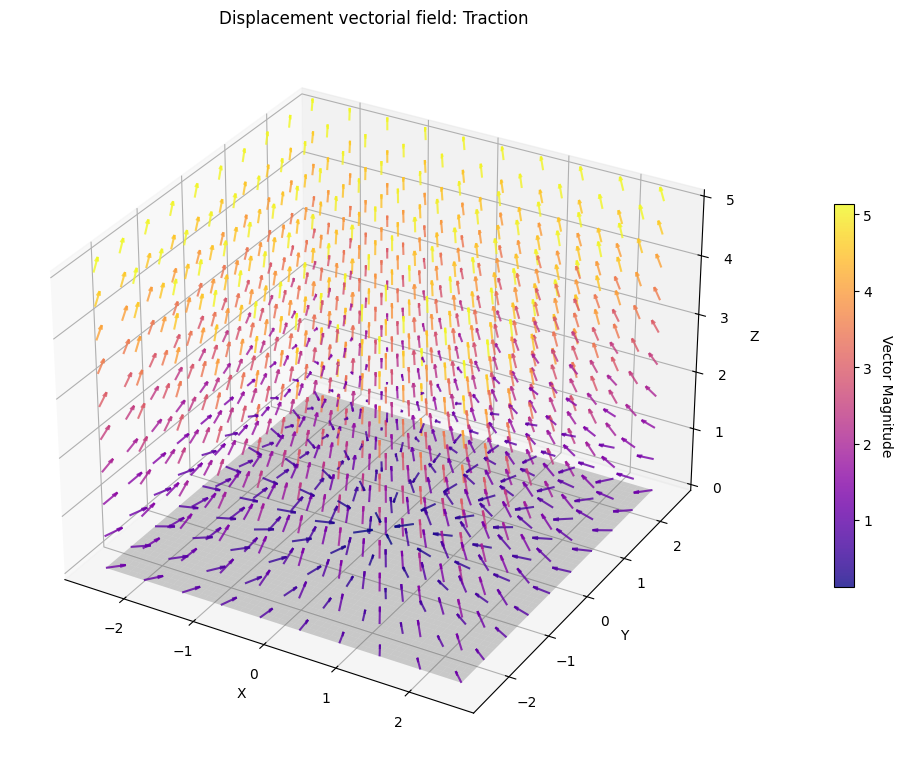

In [3]:
# Traction sigma_0 positive
u_x = lambda X, Y, Z: - X / 3
u_y = lambda X, Y, Z: - Y / 3
u_z = lambda X, Y, Z: Z

plotter(u_x, u_y, u_z, 'Traction')

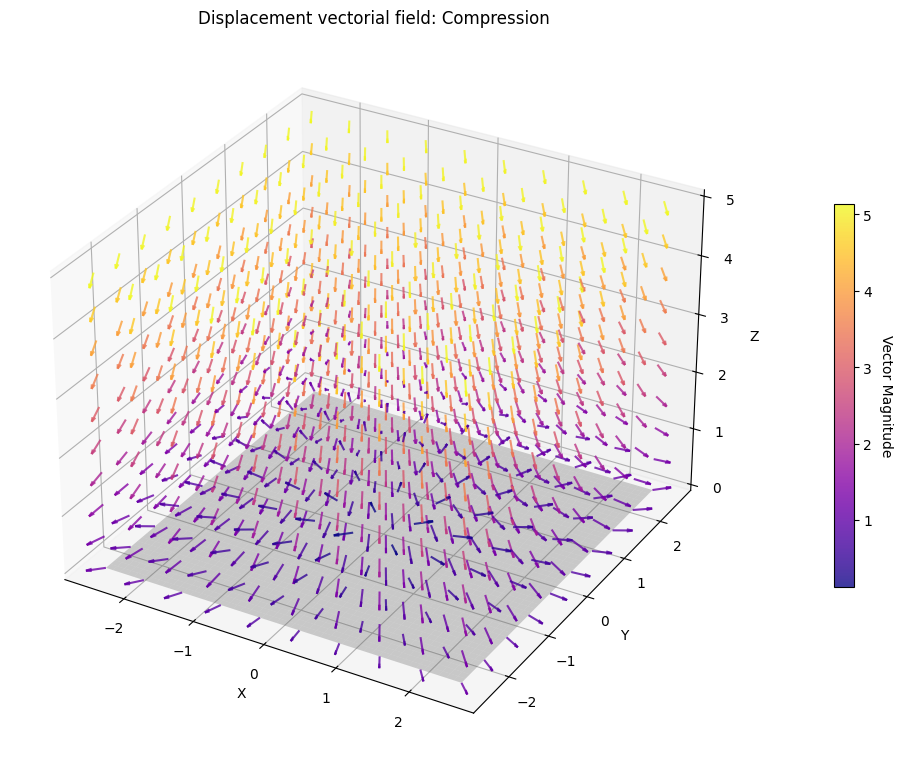

In [4]:
# Compression sigma_0 negative
u_x = lambda X, Y, Z: X / 3
u_y = lambda X, Y, Z: Y / 3
u_z = lambda X, Y, Z: - Z

plotter(u_x, u_y, u_z, 'Compression')

## Pure bending

On the left base, a torsional moment acts along the -x axis, while on the right base, the same moment acts in the opposite direction, along +x. This time, there are no macroscopic external forces acting on the two bases. The stress tensor field can be modeled as:

$$
    \begin{bmatrix}
        0 & 0 & 0 \\
        0 & 0 & 0 \\
        0 & 0 & \sigma_0 \, y
    \end{bmatrix}
$$

Where $\sigma_0$ is a real constant, either positive or negative.

Using the Hooke's law we get the following strain tensor field:

$$
    \frac{\sigma_0}{E} \, y \begin{bmatrix}
                                - \nu & 0 & 0 \\
                                0 & - \nu & 0 \\
                                0 & 0 & 1
                            \end{bmatrix}
$$

And then, using its definition, we get the system to solve:

$$
    \begin{cases}
        \frac{\partial u_x}{\partial x} = - \frac{\nu}{E} \sigma_0 \, y \\
        \frac{\partial u_y}{\partial y} = - \frac{\nu}{E} \sigma_0 \, y \\
        \frac{\partial u_z}{\partial z} = \frac{\sigma_0}{E} \, y \\
        \frac{\partial u_x}{\partial y} + \frac{\partial u_y}{\partial x} = 0 \\
        \frac{\partial u_x}{\partial z} + \frac{\partial u_z}{\partial x} = 0 \\
        \frac{\partial u_y}{\partial z} + \frac{\partial u_z}{\partial y} = 0
    \end{cases}
$$

The general solution for the displacement is:

$$
    \begin{cases}
        u_x = - \frac{\nu \sigma_0}{E} \, x y + a y + b z + c \\
        u_y = \frac{\nu \sigma_0}{2 E} \, x ^ {2} - \frac{\nu \sigma_0}{2 E} \, y ^ {2} - \frac{\sigma_0}{2 E} \, z ^ {2} - a x - d z + e \\
        u_z = \frac{\sigma_0}{E} \, y z - b x + d y + f
    \end{cases}
$$

As in the previous scenario, we can set all the arbitrary coefficients to zero because there is not any rigid body motion. Thus, the final solution is:

$$
    \begin{cases}
        u_x = - \frac{\nu \sigma_0}{E} \, x y + a y \\
        u_y = \frac{\nu \sigma_0}{2 E} \, x ^ {2} - \frac{\nu \sigma_0}{2 E} \, y ^ {2} - \frac{\sigma_0}{2 E} \, z ^ {2} \\
        u_z = \frac{\sigma_0}{E} \, y z
    \end{cases}
$$

In vectorial notation:

$$
    \frac{\sigma_0}{E} \begin{bmatrix}
        - \nu \, x y  \\
        \frac{\nu}{2} \left( x ^ 2 - y ^ 2 - \frac{z ^ 2}{\nu} \right) \\
        y z 
    \end{bmatrix}
$$

Computing the x-component of the internal torsional moment:

$$
    M _ x ^ {int} \triangleq \iint _ {A} \sigma_{zz} \, y \, dA
$$

We get:

$$
    M = \sigma_0 \iint _ {A} y ^ 2 \, dx \, dy
$$

Using:

$$
    \iint _ {A} y ^ 2 \, dx \, dy = \frac{I_{11}}{\rho L} - \frac{1}{3} \, A L ^ 2
$$

Where $I_{11}$ is the first component of the inertia tensor of the beam.

$\sigma_0$ can be written as:

$$
    \sigma_0 = \frac{M}{\frac{I_{11}}{\rho L} - \frac{1}{3} \, A L ^ 2}
$$

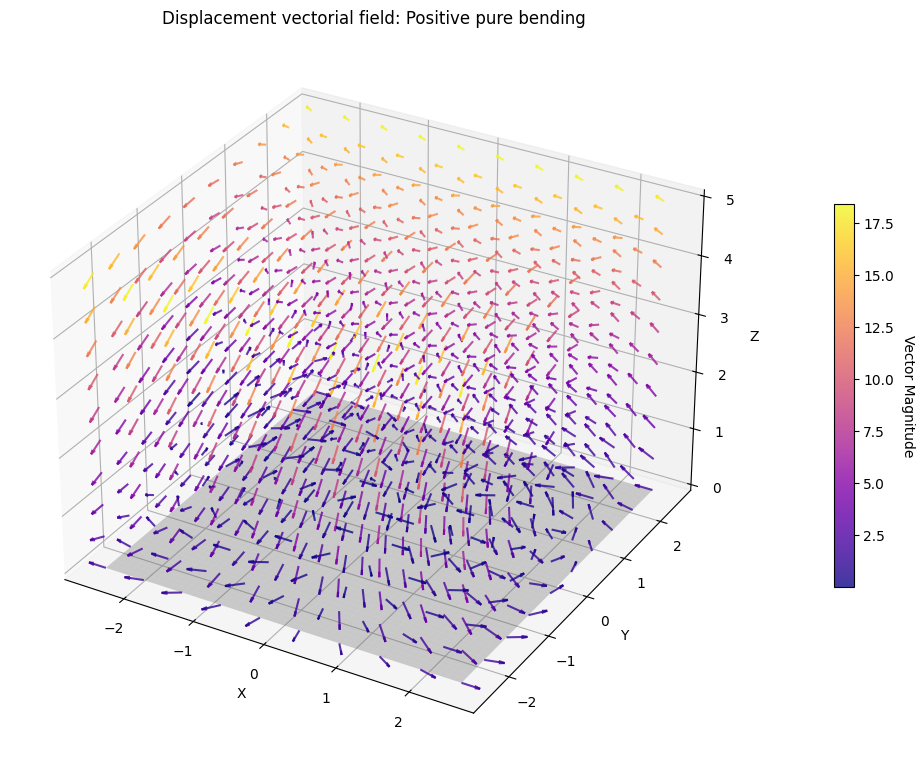

In [5]:
# Pure bending for sigma_0 positive
u_x = lambda X, Y, Z: - X * Y / 3
u_y = lambda X, Y, Z: 1 / 6 * (X ** 2 - Y ** 2 - 3 * Z ** 2)
u_z = lambda X, Y, Z: Y * Z

plotter(u_x, u_y, u_z, 'Positive pure bending')

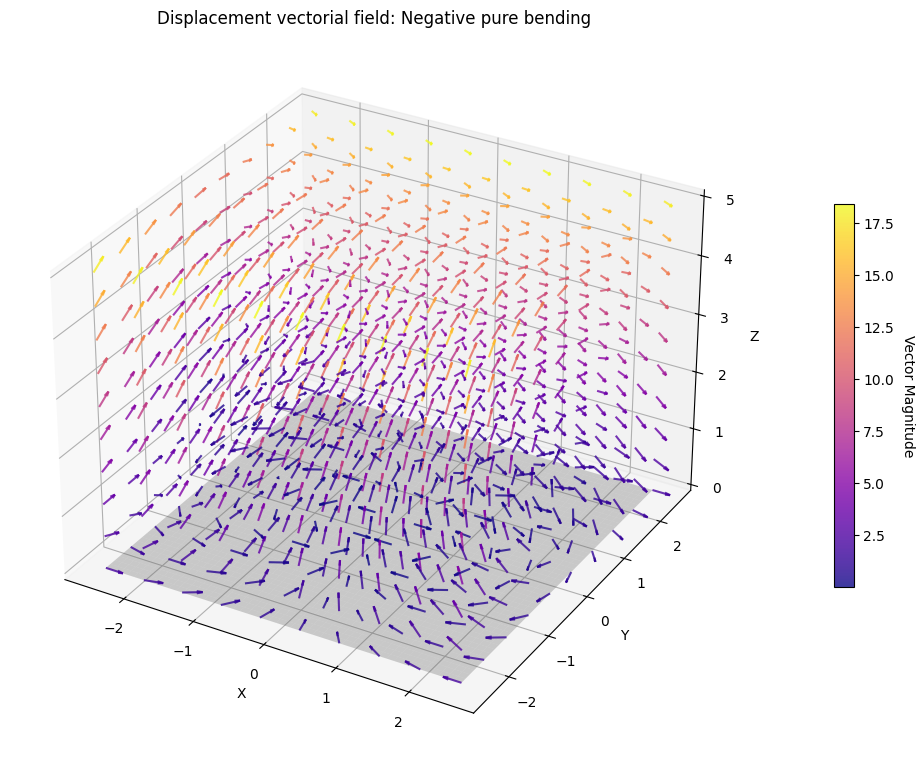

In [6]:
# Pure bending for sigma_0 negative
u_x = lambda X, Y, Z: X * Y / 3
u_y = lambda X, Y, Z: - 1 / 6 * (X ** 2 - Y ** 2 - 3 * Z ** 2)
u_z = lambda X, Y, Z: - Y * Z

plotter(u_x, u_y, u_z, 'Negative pure bending')

Similarly, we can modelize the stress tensor field as:

$$
    \begin{bmatrix}
        0 & 0 & 0 \\
        0 & 0 & 0 \\
        0 & 0 & \sigma_0 \, x
    \end{bmatrix}
$$

Getting the following displacement vector field:

$$
    \begin{cases}
        u_x = - \frac{\nu \sigma_0}{2 E} \, x ^ {2} + \frac{\nu \sigma_0}{2 E} \, y ^ {2} - \frac{\sigma_0}{2 E} \, z ^ {2} \\
        u_y = - \nu \frac{\sigma_0}{E} \, x y \\
        u_z = \frac{\sigma_0}{E} \, x z
    \end{cases}
$$

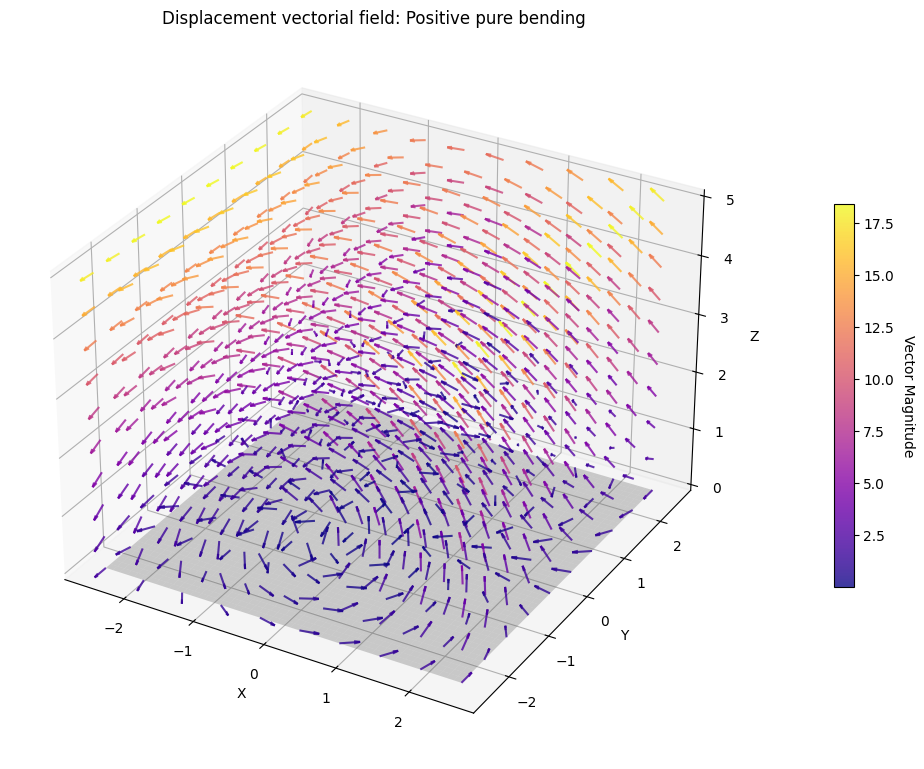

In [7]:
# Pure bending for sigma_0 positive
u_x = lambda X, Y, Z: 1 / 6 * (- X ** 2 + Y ** 2 - 3 * Z ** 2)
u_y = lambda X, Y, Z: - X * Y / 3
u_z = lambda X, Y, Z: X * Z

plotter(u_x, u_y, u_z, 'Positive pure bending')

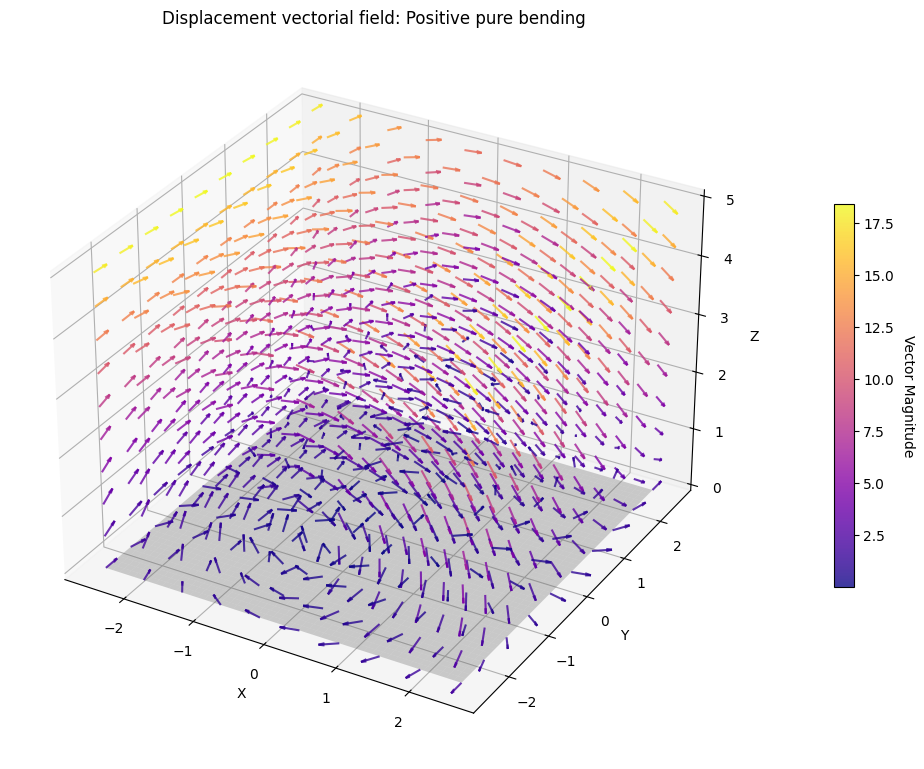

In [8]:
# Pure bending for sigma_0 positive
u_x = lambda X, Y, Z: - 1 / 6 * (- X ** 2 + Y ** 2 - 3 * Z ** 2)
u_y = lambda X, Y, Z: X * Y / 3
u_z = lambda X, Y, Z: - X * Z

plotter(u_x, u_y, u_z, 'Positive pure bending')